In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pycaret-exo-data/train_data_temp.csv
/kaggle/input/exop-data/yn_train.npy
/kaggle/input/exop-data/xn_train.npy
/kaggle/input/exo-data/testing.npy
/kaggle/input/exo-data/error_bars.npy
/kaggle/input/exo-data/training.npy
/kaggle/input/exo-data/wavelength.npy
/kaggle/input/exo-data/WASP12b.npy


### Tuning Extra Tree Regressor 

In [2]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 66.6 MB/s eta 0:00:00
  Using cached importlib_metadata-6.4.0-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.9 MB/s eta 0:

In [3]:
from pycaret.regression import *
import pandas as pd

In [4]:
data = np.load("/kaggle/input/exo-data/training.npy")
data2 = np.load("/kaggle/input/exo-data/testing.npy")

In [5]:
data1 = data[:,:14]
df1 = pd.DataFrame(data1)
data3 = data2[:,:14]
testdata = pd.DataFrame(data3)

In [6]:
#testdata

In [7]:
#df1

In [8]:
#myDataSet = pd.read_csv("/kaggle/input/pycaret-exo-data/train_data_temp.csv")

In [9]:
s = setup(data = df1, train_size = 1.0 , test_data = testdata, target='13', session_id = 123, use_gpu=True)

,Description,Value
0,Session id,123
1,Target,13
2,Target type,Regression
3,Original data shape,"(100000, 14)"
4,Transformed data shape,"(140002, 14)"
5,Transformed train set shape,"(100000, 14)"
6,Transformed test set shape,"(40002, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [10]:
xgboost = create_model('xgboost', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,244.9187,127322.6484,356.8230,0.7351,0.2539,0.1831
1,241.3123,123186.3281,350.9791,0.7431,0.2520,0.1811
2,242.6794,125335.1406,354.0270,0.7428,0.2536,0.1830
3,246.8922,130692.9688,361.5148,0.7275,0.2563,0.1830
4,246.1075,128779.2734,358.8583,0.7299,0.2557,0.1835
5,243.8259,126656.2969,355.8880,0.7372,0.2530,0.1811
6,243.3604,123874.4844,351.9581,0.7433,0.2539,0.1848
7,244.2574,126589.4766,355.7942,0.7343,0.2557,0.1839
8,247.7047,133404.8281,365.2462,0.7227,0.2583,0.1843


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

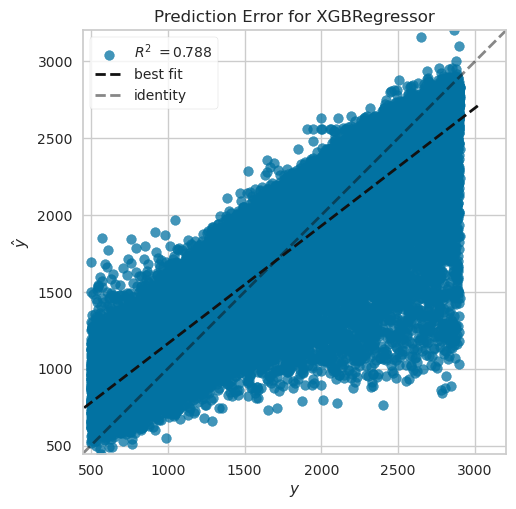

In [11]:
plot_model(xgboost , plot = 'error' ,use_train_data = False)

In [12]:
#et = create_model('et', fold=10)

In [13]:
#rf = create_model('rf', fold=10)

In [14]:
tuned_xgboost, tuner = tune_model(xgboost, return_tuner=True,n_iter = 100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,232.7533,120710.4141,347.4341,0.7489,0.2470,0.1743
1,229.3042,116010.4688,340.6031,0.7581,0.2443,0.1721
2,230.0869,118150.5156,343.7303,0.7576,0.2459,0.1739
3,235.5619,123739.4688,351.7662,0.7420,0.2494,0.1753
4,234.1610,121635.4141,348.7627,0.7449,0.2483,0.1751
5,232.2050,119630.8516,345.8769,0.7518,0.2459,0.1730
6,231.3567,116953.3203,341.9844,0.7576,0.2453,0.1750
7,232.4294,119014.4609,344.9847,0.7502,0.2476,0.1757
8,235.2126,126371.2031,355.4873,0.7374,0.2507,0.1748


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [15]:
tuned_xgboost

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=0, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=200,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=5, reg_lambda=10, ...)

In [16]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=FastMemory(location=/tmp/joblib),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                                                                          '7',
                                                                          '8',
                                                                   

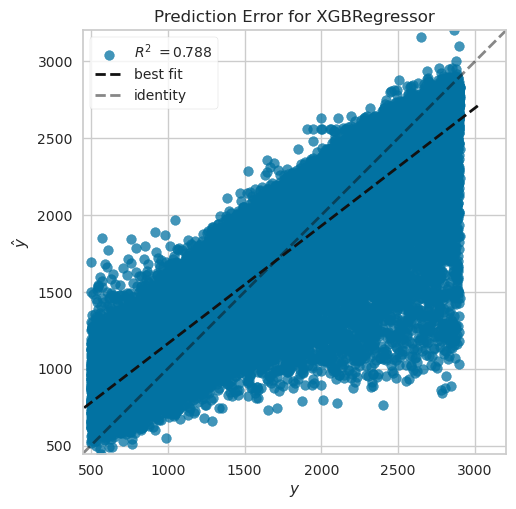

In [17]:
plot_model(xgboost , plot = 'error' ,use_train_data = False)

In [18]:
et = create_model('et', fold=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,229.0437,118496.8370,344.2337,0.7535,0.2475,0.1755
1,225.4159,113816.0232,337.3663,0.7627,0.2443,0.1730
2,227.6504,118126.1949,343.6949,0.7576,0.2482,0.1756
3,231.5973,121714.1690,348.8756,0.7463,0.2505,0.1771
4,229.9978,119598.6205,345.8303,0.7491,0.2487,0.1756
5,228.3021,118112.0900,343.6744,0.7550,0.2477,0.1747
6,228.8275,116875.4450,341.8705,0.7578,0.2488,0.1778
7,228.4099,117402.2193,342.6401,0.7536,0.2490,0.1770
8,233.2601,126064.4764,355.0556,0.7380,0.2538,0.1779


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

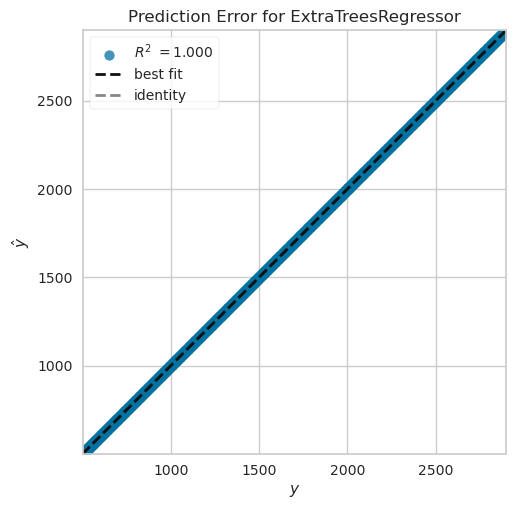

In [19]:
plot_model(et , plot = 'error' ,use_train_data = False)

In [20]:
et = create_model('et', fold=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,227.4646,118787.3197,344.6554,0.7539,0.2479,0.1747
1,229.5640,117435.0560,342.6880,0.7546,0.2453,0.1750
2,226.5246,115223.1281,339.4453,0.7607,0.2479,0.1751
3,224.7721,112986.5661,336.1347,0.7635,0.2416,0.1708
4,226.7411,117169.4742,342.3003,0.7602,0.2491,0.1768
5,227.8429,117749.6381,343.1467,0.7577,0.2461,0.1737
6,227.9055,117202.6342,342.3487,0.7557,0.2462,0.1732
7,234.7432,126297.5603,355.3837,0.7362,0.2548,0.1798
8,227.2643,115707.0631,340.1574,0.7581,0.2487,0.1770


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
#plot_model(et , plot = 'error' ,use_train_data = False)

In [22]:
#plot_model(rf , plot = 'error' ,use_train_data = False)

In [23]:
#plot_model(rf , plot = 'error')

In [24]:
# tune hyperparameters of dt
#tuned_rf = tune_model(rf ,fold=3,n_iter=5)

In [25]:
#tuned_et, tuner = tune_model(et, return_tuner=True)


In [26]:
#tuned_et

In [27]:
#tuner